# taking a look at sentiment by state and counties

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import os
import sys

sys.path.append(os.path.abspath("C:/Users/Alex/Documents/My Data Files/COVID Research/analysis/mention_2_hashtag.py"))

from analysis.functions.mention_2_hashtag import * 
from analysis.functions.datamanip import *

FIN = 'newest_data/flair.joined.tweets.csv'

raw = pd.read_csv(FIN)

# changing date to more readable format
raw['created_at'] = pd.to_datetime(raw['created_at'])

# getting seperated date and time columns
raw['date'] = raw['created_at'].dt.date
raw['time'] = raw['created_at'].dt.time
raw['hour'] = raw['created_at'].dt.hour

# changing na to None
raw = raw.fillna('None')

# only 4 samples that have no sentiment
raw = raw[raw['sentiment'] != 'None']

raw.head()

,id_str,created_at,follower_count,friends_count,statefips,countyfips,countyname,is_urban,ogtext,cleantext,mentions,hashtags,pos,ner,sentiment,sent_confidence,date,time,hour
0,id:1226763665036075008,2020-02-10 07:03:44+00:00,270.0,539.0,32.0,3.0,Clark,1,having a mocha and avoiding coronavirus at the...,have mocha avoid coronavirus airport,None,None,"[['having', 'VBG'], ['a', 'DT'], ['mocha', 'NN...",None,POSITIVE,0.940228,2020-02-10,07:03:44,7
1,id:1226763937317818368,2020-02-10 07:04:49+00:00,199.0,216.0,36.0,81.0,Queens,1,our hearts beat with china,heart beat china,['linsapna'],None,"[['our', 'PRP$'], ['hearts', 'NNS'], ['beat', ...",None,POSITIVE,0.872616,2020-02-10,07:04:49,7
2,id:1226764107958734851,2020-02-10 07:05:30+00:00,235.0,130.0,4.0,13.0,Maricopa,1,people stop my sister in the street to make fu...,people stop sister street fun wearing mask s a...,None,None,"[['people', 'NNS'], ['stop', 'VBP'], ['my', 'P...",None,POSITIVE,0.925717,2020-02-10,07:05:30,7
3,id:1226765442548719616,2020-02-10 07:10:48+00:00,60008.0,51176.0,5.0,119.0,Pulaski,0,coronavirus death toll surpasses the number o...,coronavirus death toll surpass number fatal...,None,None,"[['coronavirus', 'NN'], ['death', 'NN'], ['tol...",None,NEGATIVE,0.994157,2020-02-10,07:10:48,7
4,id:1226765540229861376,2020-02-10 07:11:11+00:00,60008.0,51176.0,5.0,119.0,Pulaski,0,coronavirus cases aboard japanese cruise ship...,coronavirus case aboard japanese cruise shi...,None,None,"[['coronavirus', 'NN'], ['cases', 'NNS'], ['ab...",None,NEGATIVE,0.998726,2020-02-10,07:11:11,7


# code for converting fips to names

In [2]:
def convert_fips(unknown_fips_list, fin):
    
    def convert(fipsline):
        name, postal, fips= fipsline.strip().split('\t')

        return {fips: name}

    fips_dict = {f: n 
                for dic in [convert(line)for line in open(fin, 'r')]
                for f, n in dic.items()}

    return [fips_dict[f'{unknown:02d}'] for unknown in unknown_fips_list]

fips_df = raw[raw['statefips'] != 'None']

fips_df['state_name'] = convert_fips([int(float(fips)) for fips in fips_df['statefips']],
                     'analysis/functions/state.fips.txt')

fips_df.head()

,id_str,created_at,follower_count,friends_count,statefips,countyfips,countyname,is_urban,ogtext,cleantext,mentions,hashtags,pos,ner,sentiment,sent_confidence,date,time,hour,state_name
0,id:1226763665036075008,2020-02-10 07:03:44+00:00,270.0,539.0,32.0,3.0,Clark,1,having a mocha and avoiding coronavirus at the...,have mocha avoid coronavirus airport,None,None,"[['having', 'VBG'], ['a', 'DT'], ['mocha', 'NN...",None,POSITIVE,0.940228,2020-02-10,07:03:44,7,Nevada
1,id:1226763937317818368,2020-02-10 07:04:49+00:00,199.0,216.0,36.0,81.0,Queens,1,our hearts beat with china,heart beat china,['linsapna'],None,"[['our', 'PRP$'], ['hearts', 'NNS'], ['beat', ...",None,POSITIVE,0.872616,2020-02-10,07:04:49,7,New York
2,id:1226764107958734851,2020-02-10 07:05:30+00:00,235.0,130.0,4.0,13.0,Maricopa,1,people stop my sister in the street to make fu...,people stop sister street fun wearing mask s a...,None,None,"[['people', 'NNS'], ['stop', 'VBP'], ['my', 'P...",None,POSITIVE,0.925717,2020-02-10,07:05:30,7,Arizona
3,id:1226765442548719616,2020-02-10 07:10:48+00:00,60008.0,51176.0,5.0,119.0,Pulaski,0,coronavirus death toll surpasses the number o...,coronavirus death toll surpass number fatal...,None,None,"[['coronavirus', 'NN'], ['death', 'NN'], ['tol...",None,NEGATIVE,0.994157,2020-02-10,07:10:48,7,Arkansas
4,id:1226765540229861376,2020-02-10 07:11:11+00:00,60008.0,51176.0,5.0,119.0,Pulaski,0,coronavirus cases aboard japanese cruise ship...,coronavirus case aboard japanese cruise shi...,None,None,"[['coronavirus', 'NN'], ['cases', 'NNS'], ['ab...",None,NEGATIVE,0.998726,2020-02-10,07:11:11,7,Arkansas


# top counts by state

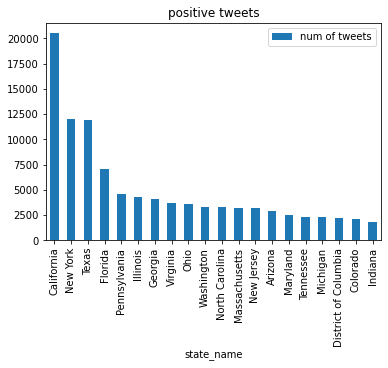

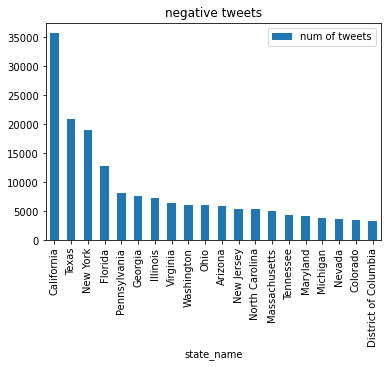

In [3]:
states = fips_df.groupby(['state_name', 'sentiment']).agg({'cleantext':'count'}).sort_values(by='cleantext', ascending=False).reset_index().rename(columns={'cleantext': 'num of tweets'}).set_index('state_name')

states[states['sentiment'] == 'POSITIVE'].head(20).plot.bar(title='positive tweets')
states[states['sentiment'] == 'NEGATIVE'].head(20).plot.bar(title='negative tweets')

# things to do

+ number of tweets by state / county
+ ratio of negative or positive by state / county